## Task ii - Case Study 1: Clustering Model for Customer Segmentation

1. Python Developer: Sulaiha Subi
2. Created Date: 24-08-24
3. Goal:- 
    > The result will be a set of customer segments that the business can target with specific marketing strategies.
    
    >This could help in personalizing the shopping experience and improving overall engagement and conversion rates.

### Step 0: Install Libraries

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy plotly notebook jupyterlab openpyxl yellowbrick pandas-profiling

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Step 1: Load and Understanding the Data

In [2]:
import pandas as pd

# File paths
session_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/fct_session.csv'
user_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/dim_user.csv'
order_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/fct_order.csv'

# Load the data into pandas dataframes
session_df = pd.read_csv(session_file_path)
user_df = pd.read_csv(user_file_path)
order_df = pd.read_csv(order_file_path)

# Display the first few rows of each dataframe to understand the structure
print("Data of user behavior during their visits to the e-commerce platform (Session):")
display(session_df.head())

print("\n Data of user demographic information and other attributes (Users):")
display(user_df.head())

print("\n Order data, including items purchased, total order value, and order completion status (Order):")
display(order_df.head())


Data of user behavior during their visits to the e-commerce platform (Session):


,session_id,operating_system,session_date,event_timestamp,event_transaction_id,country_name,final_user_id,guest_uuid_id,device_id,anonymous_id,first_user_type,first_registered_type,last_user_type,last_registered_type,device_model,event_name,page_source,order_id,total_order_amount
0,04a5e8fbb098e1460016100e7953dd99,ios,2023-10-25,2023-10-25 23:23:05.816000,4E355C5A-4984-4AA3-B6B2-B3CD82E68748,Saudi Arabia,d9815b0feaee15da866f84fb88e04bd1,NaN,50E0F0E4-346C-43E9-A353-71FC61D80D40,F415DEB1-09CE-405F-8CA4-2B714E126B06,customer,existing customer,customer,existing customer,"iPhone14,2",application backgrounded,NaN,NaN,NaN
1,04a5e8fbb098e1460016100e7953dd99,ios,2023-10-25,2023-10-25 23:23:14.307000,ADD8356D-0318-4952-AACB-CB79505701BE,Saudi Arabia,d9815b0feaee15da866f84fb88e04bd1,NaN,50E0F0E4-346C-43E9-A353-71FC61D80D40,F415DEB1-09CE-405F-8CA4-2B714E126B06,customer,existing customer,customer,existing customer,"iPhone14,2",application backgrounded,NaN,NaN,NaN
2,04a5e8fbb098e1460016100e7953dd99,ios,2023-10-25,2023-10-25 23:23:22.942000,13A19781-4FA8-493E-8E02-D8BE1D2EAC2A,Saudi Arabia,d9815b0feaee15da866f84fb88e04bd1,NaN,50E0F0E4-346C-43E9-A353-71FC61D80D40,F415DEB1-09CE-405F-8CA4-2B714E126B06,customer,existing customer,customer,existing customer,"iPhone14,2",application backgrounded,NaN,NaN,NaN
3,04a5e8fbb098e1460016100e7953dd99,ios,2023-10-25,2023-10-25 23:24:38.151000,A6156D2C-7539-4C2D-87F7-26F668CB5D93,Saudi Arabia,d9815b0feaee15da866f84fb88e04bd1,NaN,50E0F0E4-346C-43E9-A353-71FC61D80D40,F415DEB1-09CE-405F-8CA4-2B714E126B06,customer,existing customer,customer,existing customer,"iPhone14,2",application backgrounded,NaN,NaN,NaN
4,04a5e8fbb098e1460016100e7953dd99,ios,2023-10-25,2023-10-25 23:32:15.222000,33976D63-8987-4B56-A393-A28041A3DC2E,Saudi Arabia,d9815b0feaee15da866f84fb88e04bd1,NaN,50E0F0E4-346C-43E9-A353-71FC61D80D40,F415DEB1-09CE-405F-8CA4-2B714E126B06,customer,existing customer,customer,existing customer,"iPhone14,2",application backgrounded,NaN,NaN,NaN



 Data of user demographic information and other attributes (Users):


,user_id,user_gender,country_name,loyalty_point_balance,first_order_date,last_order_date
0,00768dbd47c1a935ee00010d590e5652,NaN,NaN,0,NaN,NaN
1,016b053632a6e852ad9f148dc1ca8e03,NaN,NaN,0,NaN,NaN
2,02ba753725c66619b28a76e314eacb11,male,Saudi Arabia,0,2023-08-01,2023-08-01
3,02dbec7f743eef5251c49278f7dd1b21,female,United Arab Emirates,0,2023-03-11,2023-03-11
4,034cb073b6a2796f20e07e2ce84ee3cf,female,Saudi Arabia,0,2023-07-25,2023-07-25



 Order data, including items purchased, total order value, and order completion status (Order):


,order_id,order_placed_date,user_id,order_status_name,order_type_name,order_type_group_name,order_channel_name,order_picked_date_utc,order_delivered_date_utc,delivery_country_name,grand_total_usd
0,832492,2021-02-14,d37018d3c0387c178334e9f76d374421,Confirmed,Sales,online,Ios,NaN,2021-02-16 23:20:29.000000,Qatar,123.80
1,1088419,2021-04-11,34f270f09d45bc894ef5f14f0bddf547,Confirmed,Sales,online,Ios,NaN,2021-04-11 16:49:57.500000,Bahrain,84.87
2,871656,2021-02-24,b075b7503cf74f84cd374edc8bbced49,Confirmed,Sales,online,Ios,NaN,2021-02-25 20:14:56.013000,Qatar,101.79
3,851363,2021-02-18,b075b7503cf74f84cd374edc8bbced49,Confirmed,Sales,online,Ios,NaN,2021-02-18 11:29:30.000000,Qatar,101.79
4,852536,2021-02-18,ee3d6d258030acc04e1a5262768a4a93,Confirmed,Sales,online,Ios,NaN,2021-02-18 16:07:53.000000,Saudi Arabia,343.77


In [3]:
# Check shape of the dataframe
print(f"Session DataFrame Shape: {session_df.shape}")
print(f"User DataFrame Shape: {user_df.shape}")
print(f"Order DataFrame Shape: {order_df.shape}")

Session DataFrame Shape: (846682, 19)
User DataFrame Shape: (9460, 6)
Order DataFrame Shape: (59213, 11)


In [4]:
# Check coloumn name and data types
print(session_df.dtypes)
print("\n")
print(user_df.dtypes)
print("\n")
print(order_df.dtypes)

session_id                object
operating_system          object
session_date              object
event_timestamp           object
event_transaction_id      object
country_name              object
final_user_id             object
guest_uuid_id             object
device_id                 object
anonymous_id              object
first_user_type           object
first_registered_type     object
last_user_type            object
last_registered_type      object
device_model              object
event_name                object
page_source               object
order_id                 float64
total_order_amount       float64
dtype: object


user_id                  object
user_gender              object
country_name             object
loyalty_point_balance     int64
first_order_date         object
last_order_date          object
dtype: object


order_id                      int64
order_placed_date            object
user_id                      object
order_status_name            object
order

In [5]:
# Get summary statistics for numerical columns
print(session_df.describe())
print("\n")
print(user_df.describe())
print("\n")
print(order_df.describe())

           order_id  total_order_amount
count  4.297460e+05        22497.000000
mean   7.431715e+06          105.467637
std    1.047079e+06           92.983694
min    0.000000e+00            0.000000
25%    6.608284e+06           58.926000
50%    7.652292e+06           82.500000
75%    8.383728e+06          118.316000
max    8.986668e+06         2648.448000


       loyalty_point_balance
count            9460.000000
mean              130.925793
std               545.617690
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                60.000000
max             31981.000000


           order_id  grand_total_usd
count  5.921300e+04     59213.000000
mean   5.290985e+06       117.317243
std    2.471617e+06       119.132679
min    7.020000e+03         0.000000
25%    3.345354e+06        66.340000
50%    5.675588e+06        91.440000
75%    7.350417e+06       131.860000
max    9.009989e+06     15269.300000


In [6]:
# Check missing value
print(session_df.isnull().sum())
print("\n")
print(user_df.isnull().sum())
print("\n")
print(order_df.isnull().sum())


session_id                    0
operating_system              0
session_date                  0
event_timestamp               0
event_transaction_id          0
country_name              11258
final_user_id                 0
guest_uuid_id            588166
device_id                 61249
anonymous_id                  0
first_user_type               0
first_registered_type         0
last_user_type                0
last_registered_type          0
device_model              61249
event_name                    0
page_source              755965
order_id                 416936
total_order_amount       824185
dtype: int64


user_id                     0
user_gender               760
country_name             1278
loyalty_point_balance       0
first_order_date         2146
last_order_date          2146
dtype: int64


order_id                        0
order_placed_date               0
user_id                         0
order_status_name               0
order_type_name                 6
order_type_g

### Step 2: Data Cleaning & Preprocessing

#### Step 2.1 - Handle the Missing Value

##### a. Session Data (session_df)

In [7]:
# handling missing value in Session Data (session_df)
session_df['country_name'].fillna('Unknown', inplace=True) # important for segmentation
session_df['guest_uuid_id'].fillna('N/A', inplace=True) # might drop later ; keep it for now
session_df['device_id'].fillna('Unknown Device', inplace=True) # important to see customer device
session_df['device_model'].fillna('Unknown Device', inplace=True) # important to see customer device
session_df.drop(columns=['page_source'], inplace=True) # drop because large portion is missing & not reliable
session_df['total_order_amount'].fillna(0, inplace=True) # 0 indicates not purchase has being made

/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/2120324387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  session_df['country_name'].fillna('Unknown', inplace=True) # important for segmentation
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/2120324387.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

In [8]:
# Check shape of the dataframe
print(f"Session DataFrame Shape after Preprocessing: {session_df.shape}")

Session DataFrame Shape after Preprocessing: (846682, 18)


##### b. User Data (user_df)

In [9]:
user_df['user_gender'].fillna('Unknown', inplace=True)
user_df['country_name'].fillna('Unknown', inplace=True)
user_df['first_order_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True) # placeholder date like '1970-01-01' to handle missing for users who haven’t placed an order
user_df['last_order_date'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/2946279518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_df['user_gender'].fillna('Unknown', inplace=True)
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/2946279518.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [10]:
# Check shape of the dataframe
print(f"User DataFrame Shape after Preprocessing: {user_df.shape}")

User DataFrame Shape after Preprocessing: (9460, 6)


##### c. Order Data (order_df)

In [11]:
order_df['order_type_name'].fillna('Unknown', inplace=True)
order_df['order_type_group_name'].fillna('Unknown', inplace=True)
order_df['order_picked_date_utc'].fillna(pd.to_datetime('1970-01-01'), inplace=True)
order_df['order_delivered_date_utc'].fillna(pd.to_datetime('1970-01-01'), inplace=True)

/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/1375942129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_df['order_type_name'].fillna('Unknown', inplace=True)
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/1375942129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [12]:
# Check shape of the dataframe
print(f"Order DataFrame Shape after Preprocessing: {order_df.shape}")

Order DataFrame Shape after Preprocessing: (59213, 11)


#### Step 2.2 - Feature Engineering: session_df ; session_duration ; user_df

Overview of Feature Engineering Steps:-
1. Convert Date Columns to Datetime Format
2. Calculate Session Duration
3. Calculate User Activity Metrics
4. Calculate Order Metrics
5. Aggregate Features at the User Level
6. Handle Missing Values in Aggregated Features


##### 2.2.1. Feature Engineering - for 'session_df'

In [13]:
# Convert event_timestamp and session_date to datetime format
session_df['event_timestamp'] = pd.to_datetime(session_df['event_timestamp'])
session_df['session_date'] = pd.to_datetime(session_df['session_date'])


In [14]:
import pandas as pd
import numpy as np

# Create session_duration Feature by finding the difference between event_timestamp and session_date.
# Calculate session duration in seconds
session_df['session_duration'] = (session_df['event_timestamp'] - session_df['session_date']).dt.total_seconds()

# Replace negative or zero durations with NaN and drop them
session_df['session_duration'] = session_df['session_duration'].apply(lambda x: x if x > 0 else np.nan)
session_df.dropna(subset=['session_duration'], inplace=True)


In [15]:
# Features to create:

# total_sessions: Total number of sessions per user - Counts unique session IDs per user.
# average_session_duration: Average duration of sessions per user - Calculates mean session duration.
# total_session_duration: Total duration of all sessions per user - Sums all session durations
# unique_devices: Number of unique devices used by the user - Counts unique devices used
# most_used_device: The device most frequently used by the user - Identifies the most frequently used device model
# operating_system_mode: The most frequently used operating system by the user - Identifies the most frequently used operating system

# Aggregate session data to user level
session_agg = session_df.groupby('final_user_id').agg(
    total_sessions=pd.NamedAgg(column='session_id', aggfunc='nunique'),
    average_session_duration=pd.NamedAgg(column='session_duration', aggfunc='mean'),
    total_session_duration=pd.NamedAgg(column='session_duration', aggfunc='sum'),
    unique_devices=pd.NamedAgg(column='device_id', aggfunc=lambda x: x.nunique()),
    most_used_device=pd.NamedAgg(column='device_model', aggfunc=lambda x: x.value_counts().idxmax() if x.notnull().any() else 'Unknown'),
    operating_system_mode=pd.NamedAgg(column='operating_system', aggfunc=lambda x: x.value_counts().idxmax() if x.notnull().any() else 'Unknown')
).reset_index()

# Rename 'final_user_id' to 'user_id' for consistency
session_agg.rename(columns={'final_user_id': 'user_id'}, inplace=True)


##### 2.2.2. Feature Engineering - for 'user_df'

In [16]:
# Convert date columns to datetime
user_df['first_order_date'] = pd.to_datetime(user_df['first_order_date'])
user_df['last_order_date'] = pd.to_datetime(user_df['last_order_date'])

In [17]:
# Create customer_lifetime Feature by calculating the duration between the first and 
# last order dates to understand customer longevity.
# customer_lifetime: Represents how long a customer has been active.
# Negative or NaN values are set to 0, indicating either a single purchase or no purchase.

# Calculate customer lifetime in days
user_df['customer_lifetime'] = (user_df['last_order_date'] - user_df['first_order_date']).dt.days

# Handle cases where customer_lifetime is negative or NaN
user_df['customer_lifetime'] = user_df['customer_lifetime'].apply(lambda x: x if x >= 0 else 0)
user_df['customer_lifetime'].fillna(0, inplace=True)


/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/3477626441.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_df['customer_lifetime'].fillna(0, inplace=True)


In [18]:
# Create total_orders Feature by calculate the total number of orders per user by merging with order_df

# Calculate total orders per user
total_orders = order_df.groupby('user_id').agg(
    total_orders=pd.NamedAgg(column='order_id', aggfunc='count')
).reset_index()

# Merge with user_df
user_df = user_df.merge(total_orders, on='user_id', how='left')

# Fill NaN values with 0 for users with no orders
user_df['total_orders'].fillna(0, inplace=True)


/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/1971009435.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_df['total_orders'].fillna(0, inplace=True)


In [19]:
# Create average_order_value Feature by calculate the average order value per user

# Calculate total spend per user
total_spend = order_df.groupby('user_id').agg(
    total_spend=pd.NamedAgg(column='grand_total_usd', aggfunc='sum')
).reset_index()

# Merge with user_df
user_df = user_df.merge(total_spend, on='user_id', how='left')

# Calculate average order value
user_df['average_order_value'] = user_df['total_spend'] / user_df['total_orders']

# Handle divisions by zero
user_df['average_order_value'].replace([np.inf, -np.inf], 0, inplace=True)
user_df['average_order_value'].fillna(0, inplace=True)


/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/958959571.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_df['average_order_value'].replace([np.inf, -np.inf], 0, inplace=True)
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_16881/958959571.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [20]:
# Create loyalty_level Feature by categorize users based on their loyalty point balance

# Define loyalty levels
def categorize_loyalty(points):
    if points >= 10000:
        return 'Platinum'
    elif points >= 5000:
        return 'Gold'
    elif points >= 1000:
        return 'Silver'
    else:
        return 'Bronze'

user_df['loyalty_level'] = user_df['loyalty_point_balance'].apply(categorize_loyalty)


##### 2.2.3. Feature Engineering - for 'order_df'

In [21]:
# Convert date columns to datetime
order_df['order_placed_date'] = pd.to_datetime(order_df['order_placed_date'])
order_df['order_picked_date_utc'] = pd.to_datetime(order_df['order_picked_date_utc'])
order_df['order_delivered_date_utc'] = pd.to_datetime(order_df['order_delivered_date_utc'])

In [22]:
# Create delivery_duration Feature by calculate the time taken for an order to be delivered from the time it was placed
# delivery_duration: Time in hours between order placement and delivery
# Unrealistic durations (negative or over a week) are set to NaN

# Calculate delivery duration in hours
order_df['delivery_duration'] = (order_df['order_delivered_date_utc'] - order_df['order_placed_date']).dt.total_seconds() / 3600.0

# Replace negative or unrealistic durations with NaN
order_df['delivery_duration'] = order_df['delivery_duration'].apply(lambda x: x if x >= 0 and x < 168 else np.nan)  # Assuming deliveries should not take more than a week


In [23]:
# Create is_express_delivery Feature to identify whether an order was delivered via 
# express delivery based on delivery duration

# Define express delivery as delivery within 24 hours
order_df['is_express_delivery'] = order_df['delivery_duration'].apply(lambda x: 1 if x <= 24 else 0)

In [24]:
# Create user-level features from order data:
# total_spend: Total amount spent by the user.
# average_delivery_duration: Average delivery time for the user's orders.
# express_delivery_ratio: Proportion of orders delivered via express delivery.

# Aggregate order data to user level
order_agg = order_df.groupby('user_id').agg(
    total_spend=pd.NamedAgg(column='grand_total_usd', aggfunc='sum'),
    average_delivery_duration=pd.NamedAgg(column='delivery_duration', aggfunc='mean'),
    total_orders=pd.NamedAgg(column='order_id', aggfunc='count'),
    express_delivery_orders=pd.NamedAgg(column='is_express_delivery', aggfunc='sum')
).reset_index()

# Calculate express delivery ratio
order_agg['express_delivery_ratio'] = order_agg['express_delivery_orders'] / order_agg['total_orders']

# Drop intermediate columns
order_agg.drop(columns=['express_delivery_orders'], inplace=True)


#### Step 3: Merging the dataset

In [25]:
# average_delivery_duration: Mean delivery time across all orders
# express_delivery_ratio: Fraction of orders delivered via express delivery

# Merge session_agg and user_df
user_session_df = pd.merge(user_df, session_agg, on='user_id', how='left')

# Merge the above with order_agg
final_df = pd.merge(user_session_df, order_agg, on='user_id', how='left')

# Fill NaN values resulted from merging (for users with missing data in sessions or orders)
final_df.fillna({
    'total_sessions': 0,
    'average_session_duration': 0,
    'total_session_duration': 0,
    'unique_devices': 0,
    'most_used_device': 'Unknown',
    'operating_system_mode': 'Unknown',
    'total_spend': 0,
    'average_delivery_duration': final_df['average_delivery_duration'].mean(),
    'total_orders': 0,
    'express_delivery_ratio': 0,
    'average_order_value': 0,
    'customer_lifetime': 0
}, inplace=True)


In [26]:
# Check if the merge was successful
print(final_df.columns)

Index(['user_id', 'user_gender', 'country_name', 'loyalty_point_balance',
       'first_order_date', 'last_order_date', 'customer_lifetime',
       'total_orders_x', 'total_spend_x', 'average_order_value',
       'loyalty_level', 'total_sessions', 'average_session_duration',
       'total_session_duration', 'unique_devices', 'most_used_device',
       'operating_system_mode', 'total_spend_y', 'average_delivery_duration',
       'total_orders_y', 'express_delivery_ratio'],
      dtype='object')


#### Step 4: Encoding Categorical Variables

In [27]:
# Categorical features to encode:

# user_gender
# country_name
# loyalty_level
# most_used_device
# operating_system_mode

# One-hot encoding converts categorical variables into binary columns
# drop_first=True avoids multicollinearity by dropping the first category


# Select categorical columns
categorical_cols = ['user_gender', 'country_name', 'loyalty_level', 'most_used_device', 'operating_system_mode']

# Perform one-hot encoding
final_df_encoded = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)


In [28]:
print(final_df_encoded.columns)

Index(['user_id', 'loyalty_point_balance', 'first_order_date',
       'last_order_date', 'customer_lifetime', 'total_orders_x',
       'total_spend_x', 'average_order_value', 'total_sessions',
       'average_session_duration',
       ...
       'most_used_device_iPhone8,2', 'most_used_device_iPhone9,1',
       'most_used_device_iPhone9,2', 'most_used_device_iPhone9,3',
       'most_used_device_iPhone9,4', 'most_used_device_moto g73 5G',
       'most_used_device_motorola razr (2020)', 'most_used_device_vivo 1902',
       'operating_system_mode_ios', 'operating_system_mode_web'],
      dtype='object', length=273)


In [29]:
# Rename the columns by removing the _x suffix
final_df_encoded.rename(columns={
    'total_orders_x': 'total_orders',
    'total_spend_x': 'total_spend'
}, inplace=True)


#### Step 5: Feature Scaling

In [30]:
# Scale numerical features to ensure all features contribute equally to the distance calculations in clustering.

# Features to scale:-

# loyalty_point_balance
# customer_lifetime
# total_orders
# average_order_value
# total_sessions
# average_session_duration
# total_session_duration
# unique_devices
# total_spend
# average_delivery_duration
# express_delivery_ratio

from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# List of numerical columns
numerical_cols = [
    'loyalty_point_balance',
    'customer_lifetime',
    'total_orders',
    'average_order_value',
    'total_sessions',
    'average_session_duration',
    'total_session_duration',
    'unique_devices',
    'total_spend',
    'average_delivery_duration',
    'express_delivery_ratio'
]

# Fit and transform the data
final_df_encoded[numerical_cols] = scaler.fit_transform(final_df_encoded[numerical_cols])


#### Step 6: Data for Clustering

In [31]:
# Final dataset for clustering
clustering_df = final_df_encoded.copy()

# Optional: Save the prepared data to a CSV file
clustering_df.to_csv('/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/prepared_clustering_data.csv', index=False)


#### Step 7: Clustering - K-Means

In [32]:
# Drop the datetime columns
clustering_df = final_df_encoded.drop(columns=['first_order_date', 'last_order_date'])


In [33]:
# Identify non-numeric columns
non_numeric_cols = clustering_df.select_dtypes(include=['object', 'category']).columns
print(non_numeric_cols)


Index(['user_id'], dtype='object')


In [34]:
# Drop non-numeric columns
clustering_df = clustering_df.drop(columns=non_numeric_cols)


In [35]:
# One-hot encode categorical columns
clustering_df = pd.get_dummies(clustering_df, drop_first=True)


In [36]:
clustering_df = clustering_df.dropna()


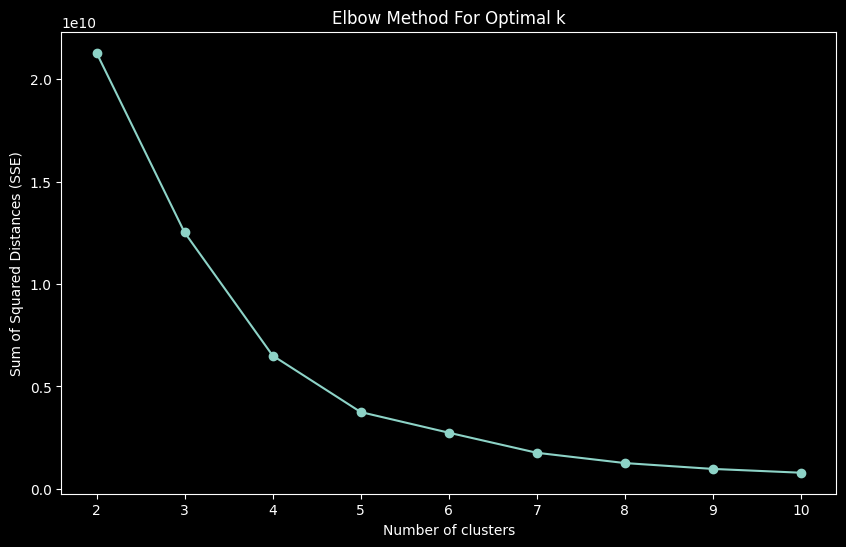

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize the list to hold sum of squared distances (SSE)
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df)
    sse.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


#### Step 7.1 Run K-Means with the Choosen Number of Clusters

In [38]:
# Based on the Elbow Method graph, the choosen K-Means algorithm with k = 4 or k = 5
# In this case k = 4

from sklearn.cluster import KMeans

# Set the number of clusters
k = 4

# Run K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clustering_df['Cluster'] = kmeans.fit_predict(clustering_df)

# Add the cluster labels to the dataframe
clustering_df['Cluster'] = kmeans.labels_


In [42]:
# Get the cluster centers
centroids = kmeans.cluster_centers_
print(centroids)


[[ 1.01542335e-03  1.66540211e-01 -5.21374574e-02 ...  1.49655792e-04
   8.78778809e-01  7.40796169e-02]
 [ 3.94888741e+00  1.98968145e+00  7.86901409e+00 ...  2.71050543e-20
   9.21052632e-01  7.89473684e-02]
 [ 8.51135521e-01  1.65784312e+00  2.77154786e+00 ... -8.13151629e-20
   9.21760391e-01  1.71149144e-02]
 [ 2.41404164e+00  2.85412826e+00  1.23108763e+01 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]


In [47]:
# Display the first few rows and column names of your dataframe
display(clustering_df.head())
display(clustering_df.columns)


,loyalty_point_balance,customer_lifetime,total_orders,total_spend,average_order_value,total_sessions,average_session_duration,total_session_duration,unique_devices,total_spend_y,...,"most_used_device_iPhone9,1","most_used_device_iPhone9,2","most_used_device_iPhone9,3","most_used_device_iPhone9,4",most_used_device_moto g73 5G,most_used_device_motorola razr (2020),most_used_device_vivo 1902,operating_system_mode_ios,operating_system_mode_web,Cluster
2,-0.239972,-0.868898,-0.395422,-0.327272,1.267053,-0.111744,0.171699,-0.155657,-0.035639,166.35,...,False,False,False,False,False,False,False,True,False,0
3,-0.239972,-0.868898,-0.395422,-0.345298,0.621966,-0.111744,-0.039186,-0.055693,-0.035639,121.85,...,False,False,False,False,False,False,False,True,False,0
4,-0.239972,-0.868898,-0.395422,-0.297022,2.349640,-0.111744,1.246140,1.071089,-0.035639,241.03,...,False,False,False,False,False,False,False,True,False,0
8,-0.239972,-0.868898,-0.395422,-0.363433,-0.027036,-0.111744,0.578786,-0.445662,-0.035639,77.08,...,False,False,False,False,False,False,False,True,False,0
9,-0.239972,-0.868898,-0.395422,-0.371133,-0.302611,-0.111744,1.075952,0.359571,-0.035639,58.07,...,False,False,False,False,False,False,False,True,False,0


Index(['loyalty_point_balance', 'customer_lifetime', 'total_orders',
       'total_spend', 'average_order_value', 'total_sessions',
       'average_session_duration', 'total_session_duration', 'unique_devices',
       'total_spend_y',
       ...
       'most_used_device_iPhone9,1', 'most_used_device_iPhone9,2',
       'most_used_device_iPhone9,3', 'most_used_device_iPhone9,4',
       'most_used_device_moto g73 5G', 'most_used_device_motorola razr (2020)',
       'most_used_device_vivo 1902', 'operating_system_mode_ios',
       'operating_system_mode_web', 'Cluster'],
      dtype='object', length=271)

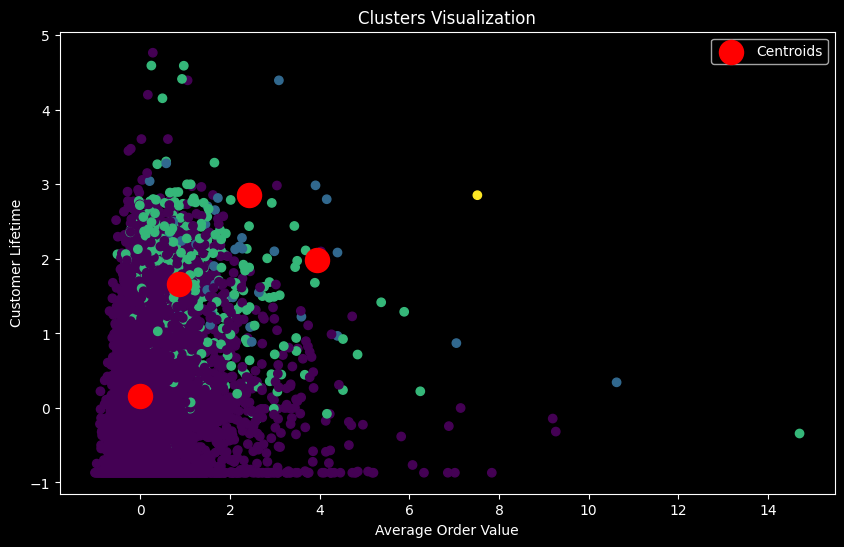

In [48]:
import matplotlib.pyplot as plt

# Replace 'average_order_value' and 'customer_lifetime' with actual column names from your dataframe
plt.figure(figsize=(10, 6))
plt.scatter(clustering_df['average_order_value'], clustering_df['customer_lifetime'], c=clustering_df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('Average Order Value')
plt.ylabel('Customer Lifetime')
plt.title('Clusters Visualization')
plt.legend()
plt.show()


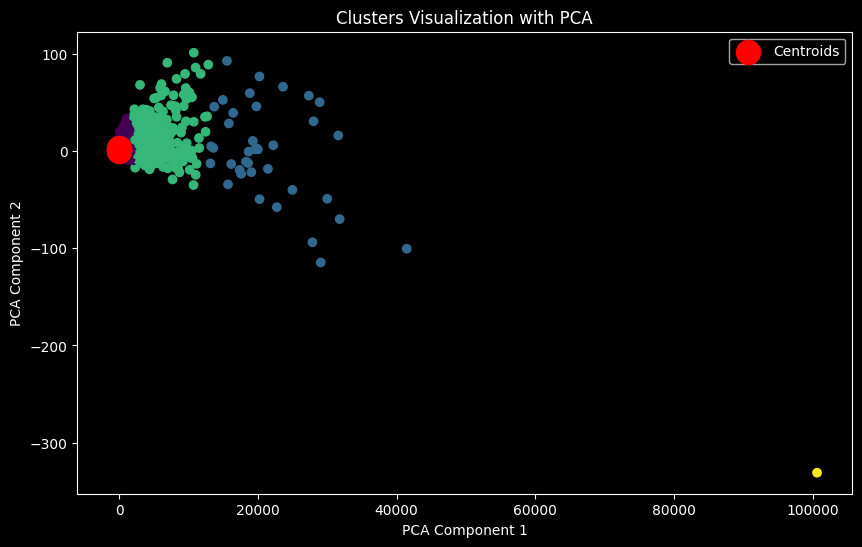

In [49]:
from sklearn.decomposition import PCA

# Drop the 'Cluster' column and apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_df.drop(columns=['Cluster']))

# Plotting the clusters using the PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clustering_df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with PCA')
plt.legend()
plt.show()


In [51]:
# Summary statistics for each cluster
cluster_summary = clustering_df.groupby('Cluster').mean()
display(cluster_summary)


,loyalty_point_balance,customer_lifetime,total_orders,total_spend,average_order_value,total_sessions,average_session_duration,total_session_duration,unique_devices,total_spend_y,...,"most_used_device_iPhone8,2","most_used_device_iPhone9,1","most_used_device_iPhone9,2","most_used_device_iPhone9,3","most_used_device_iPhone9,4",most_used_device_moto g73 5G,most_used_device_motorola razr (2020),most_used_device_vivo 1902,operating_system_mode_ios,operating_system_mode_web
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.001015,0.166540,-0.052137,-0.168424,0.320458,-0.017953,0.001304,0.050093,-0.014616,558.501220,...,0.00015,0.000449,0.00015,0.001048,0.002095,0.00015,0.0,0.00015,0.878779,0.074080
1,3.948887,1.989681,7.869014,8.595518,2.267296,0.285660,-0.113654,-0.108509,-0.035639,22194.183158,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.00000,0.921053,0.078947
2,0.851136,1.657843,2.771548,1.853376,1.055041,0.257482,-0.001523,-0.031920,0.101746,5549.750098,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.00000,0.921760,0.017115
3,2.414042,2.854128,12.310876,40.749817,7.517067,-0.111744,0.014138,-0.507150,-0.035639,101574.010000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.00000,1.000000,0.000000


##### Step 7.1.1 Interpretation of the result for K = 4 (Cluster Analysis Summary)

##### Cluster 0:
- **Loyalty Point Balance:** 0.001015 (very low)
- **Customer Lifetime:** 0.166540 (short)
- **Total Orders:** -0.052137 (negative, indicating very few or no orders)
- **Total Spend:** -0.168424 (very low spending)
- **Average Order Value:** 0.320458 (low average order value)
- **Total Sessions:** -0.017953 (low engagement)

**Description:**  
Cluster 0 represents customers who are minimally engaged. They have very low loyalty points, spend very little, and rarely place orders. Their customer lifetime is also quite short, indicating that they might be new customers who haven't interacted much with the platform or are potentially inactive users.

---

##### Cluster 1:
- **Loyalty Point Balance:** 3.948887 (moderate to high)
- **Customer Lifetime:** 1.989681 (moderate)
- **Total Orders:** 7.869014 (high number of orders)
- **Total Spend:** 8.595518 (moderate to high spending)
- **Average Order Value:** 2.267296 (moderate)
- **Total Sessions:** 0.285660 (moderate engagement)

**Description:**  
Cluster 1 appears to represent fairly loyal customers who have a moderate to high level of engagement. These customers have accumulated a significant number of loyalty points, have placed many orders, and have spent a fair amount of money on the platform. They have a decent customer lifetime and moderate average order value, suggesting consistent purchasing behavior.

---

##### Cluster 2:
- **Loyalty Point Balance:** 0.851136 (low to moderate)
- **Customer Lifetime:** 1.657843 (moderate)
- **Total Orders:** 2.771548 (moderate)
- **Total Spend:** 1.853376 (low to moderate spending)
- **Average Order Value:** 1.055041 (moderate)
- **Total Sessions:** 0.257482 (moderate engagement)

**Description:**  
Cluster 2 represents customers with moderate engagement. These customers have a moderate customer lifetime, with a moderate number of orders and spending. Their loyalty points and total spend are on the lower side, indicating that they might be occasional buyers or customers who are not heavily invested in the platform.

---

##### Cluster 3:
- **Loyalty Point Balance:** 2.414042 (high)
- **Customer Lifetime:** 2.854128 (long)
- **Total Orders:** 12.310876 (very high number of orders)
- **Total Spend:** 40.749817 (very high spending)
- **Average Order Value:** 7.517067 (very high)
- **Total Sessions:** -0.111744 (negative, might indicate some anomaly in sessions, possibly lower engagement in terms of browsing but high purchase intent)

**Description:**  
Cluster 3 represents the highest value customers. These customers have the longest customer lifetime, the highest number of orders, and the highest total spend. Their average order value is also the highest among all clusters, indicating that they make significant purchases. These are likely the most loyal and valuable customers, even though their browsing sessions may be lower, they might have very high purchase intent when they do engage.

---

##### Summary and Business Implications:

- **Cluster 0:** These customers might need re-engagement strategies, such as targeted marketing campaigns to encourage more purchases or exclusive offers to incentivize activity.
- **Cluster 1:** Customers in this cluster are loyal but could potentially be encouraged to spend more with personalized recommendations or loyalty rewards.
- **Cluster 2:** This group could be nurtured to become more loyal customers. They are moderately engaged and might respond well to targeted upselling or cross-selling strategies.
- **Cluster 3:** This is the most valuable cluster, representing your best customers. Special treatment, personalized offers, and VIP programs could help retain and even increase their loyalty and spending.
